# Análise Exploratória de Dados (EDA)
Neste notebook, exploraremos o dataset de clientes e verificaremos padrões de inadimplência.
Analisaremos variáveis categóricas, numéricas e derivadas, procurando insights sobre o comportamento dos clientes.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
data = pd.read_csv('../data/credit/clients_clean.csv')

In [4]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,years,amt_income_month,renda_per_capita,years_employed,contact,target
0,5169718,F,N,Y,0,State servant,Higher education,Married,House / apartment,NaN,2.0,28,15000.0,7500.00,5.33,1,0
1,5177389,F,N,N,0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,32,5625.0,2812.50,2.64,1,0
2,5178676,F,Y,Y,0,Working,Higher education,Married,House / apartment,Sales staff,2.0,30,15000.0,7500.00,4.48,1,0
3,5185896,F,Y,Y,0,Commercial associate,Higher education,Widow,House / apartment,NaN,1.0,49,16875.0,16875.00,4.98,1,0
4,5196912,F,N,N,0,Working,Secondary / secondary special,Married,House / apartment,Sales staff,2.0,48,9750.0,4875.00,5.30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,5998538,F,Y,Y,2,Working,Secondary / secondary special,Married,House / apartment,Sales staff,4.0,27,6375.0,1593.75,0.42,1,0
438553,5155788,F,Y,Y,0,Pensioner,Higher education,Married,House / apartment,NaN,2.0,45,37500.0,18750.00,NaN,1,1
438554,5156748,F,N,Y,0,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,2.0,56,9375.0,4687.50,NaN,1,1
438555,5159345,F,N,Y,0,Pensioner,Higher education,Separated,House / apartment,NaN,1.0,63,10125.0,10125.00,NaN,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   OCCUPATION_TYPE      304354 non-null  object 
 10  CNT_FAM_MEMBERS      438557 non-null  float64
 11  years                438557 non-null  int64  
 12  amt_income_month     438557 non-null  float64
 13  renda_per_capita     438557 non-null  float64
 14  years_employed       363228 non-null  float64
 15  contact          

In [10]:
data.describe()

,ID,CNT_CHILDREN,CNT_FAM_MEMBERS,years,amt_income_month,renda_per_capita,years_employed,contact,target
count,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,363228.000000,438557.0,438557.000000
mean,6.022176e+06,0.427390,2.194465,43.295569,15627.023840,8451.433350,7.181529,1.0,0.254642
std,5.716370e+05,0.724882,0.897207,11.459525,9173.904423,6405.192441,6.569486,0.0,0.435660
min,5.008804e+06,0.000000,1.000000,20.000000,2175.000000,468.750000,0.030000,1.0,0.000000
25%,5.609375e+06,0.000000,2.000000,34.000000,10125.000000,4687.500000,2.510000,1.0,0.000000
50%,6.047745e+06,0.000000,2.000000,42.000000,13398.380000,6562.500000,5.270000,1.0,0.000000
75%,6.456971e+06,1.000000,3.000000,53.000000,18750.000000,10312.500000,9.620000,1.0,1.000000
max,7.999952e+06,19.000000,20.000000,68.000000,562500.000000,281250.000000,48.000000,1.0,1.000000


# Variáveis Categóricas
As variáveis categóricas representam informações discretas, como gênero, posse de carro ou tipo de moradia.
Vamos analisar:
- Distribuição geral das categorias
- Comparação de inadimplência (target) entre categorias

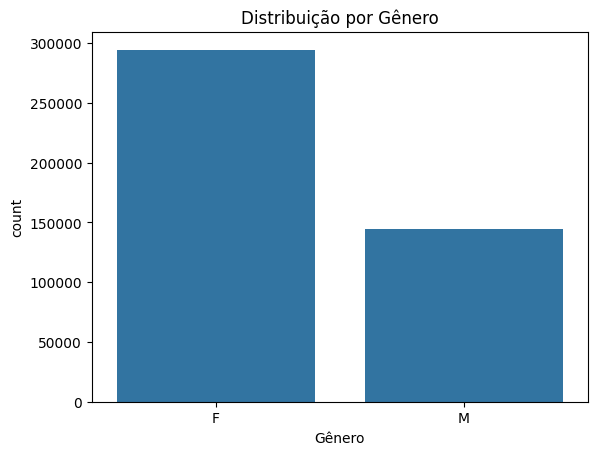

In [19]:
sns.countplot(x="CODE_GENDER",data=data)
plt.title("Distribuição por Gênero")
plt.xlabel("Gênero")
plt.show()
# Após a analise verificamos que a maioria dos clientes são do sexo feminino.

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

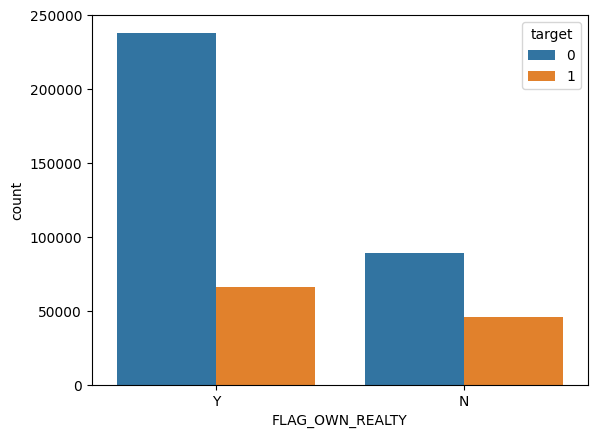

In [17]:
sns.countplot(x='FLAG_OWN_REALTY', hue='target', data=data)

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

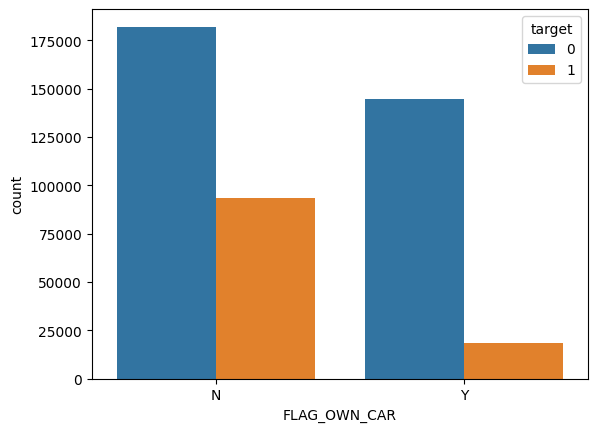

In [22]:
sns.countplot(x='FLAG_OWN_CAR', hue='target', data=data)

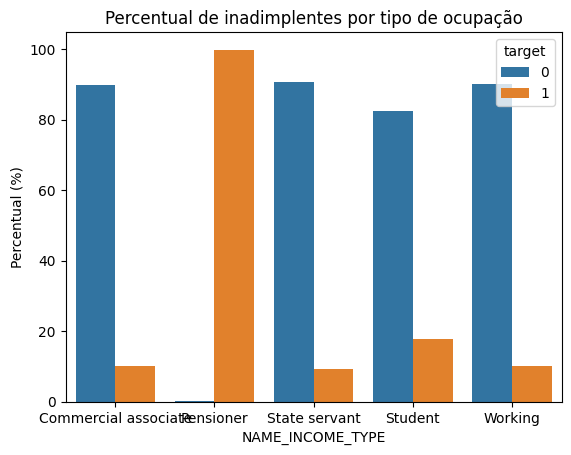

In [38]:
percent_df_ocuppation = data.groupby(['NAME_INCOME_TYPE', 'target']).size().reset_index(name='count')
percent_df_ocuppation['percent'] = percent_df_ocuppation.groupby('NAME_INCOME_TYPE')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(x='NAME_INCOME_TYPE', y='percent', hue='target', data=percent_df_ocuppation)
plt.ylabel('Percentual (%)')
plt.title('Percentual de inadimplentes por tipo de ocupação')
plt.show()

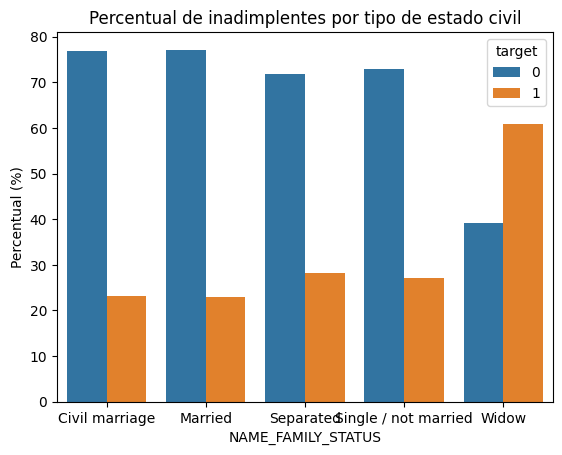

In [41]:
percent_df_family = data.groupby(['NAME_FAMILY_STATUS', 'target']).size().reset_index(name='count')
percent_df_family['percent'] = percent_df_family.groupby('NAME_FAMILY_STATUS')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(x='NAME_FAMILY_STATUS', y='percent', hue='target', data=percent_df_family)
plt.ylabel('Percentual (%)')
plt.title('Percentual de inadimplentes por tipo de estado civil')
plt.show()

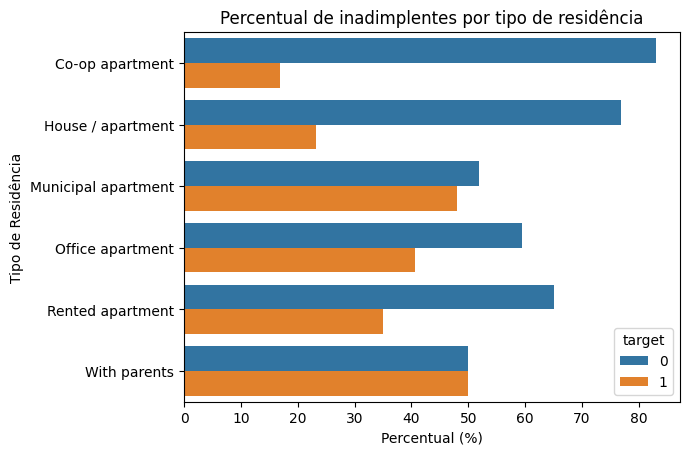

In [39]:
percent_df_resident = data.groupby(['NAME_HOUSING_TYPE', 'target']).size().reset_index(name='count')
percent_df_resident['percent'] = percent_df_resident.groupby('NAME_HOUSING_TYPE')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(y='NAME_HOUSING_TYPE', x='percent', hue='target', data=percent_df_resident)
plt.xlabel('Percentual (%)')
plt.ylabel('Tipo de Residência')
plt.title('Percentual de inadimplentes por tipo de residência')
plt.show()


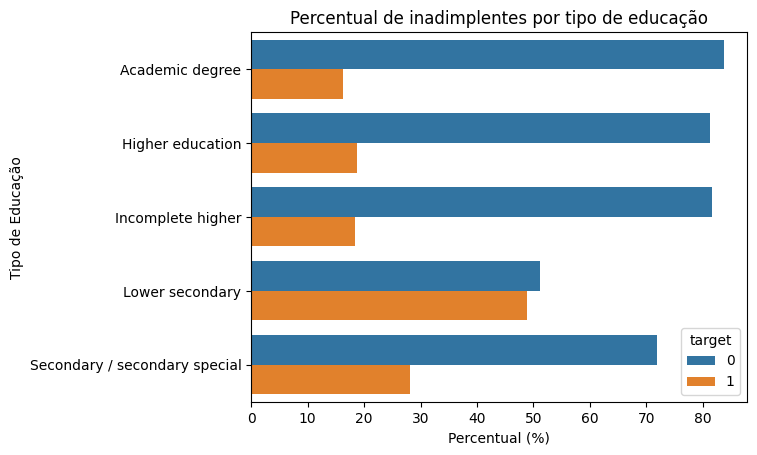

In [40]:
percent_df_education = data.groupby(['NAME_EDUCATION_TYPE', 'target']).size().reset_index(name='count')
percent_df_education['percent'] = percent_df_education.groupby('NAME_EDUCATION_TYPE')['count'].transform(lambda x: x / x.sum() * 100)

sns.barplot(y='NAME_EDUCATION_TYPE', x='percent', hue='target', data=percent_df_education)
plt.xlabel('Percentual (%)')
plt.ylabel('Tipo de Educação')
plt.title('Percentual de inadimplentes por tipo de educação')
plt.show()


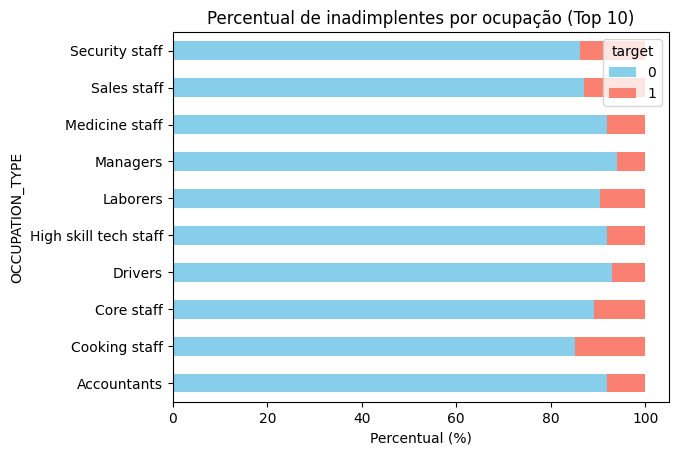

In [31]:

top_categories = data['OCCUPATION_TYPE'].value_counts().head(10).index
top_df = data[data['OCCUPATION_TYPE'].isin(top_categories)]

tab = pd.crosstab(top_df['OCCUPATION_TYPE'], top_df['target'])
tab_perc = tab.div(tab.sum(axis=1), axis=0) * 100

tab_perc.plot(kind='barh', stacked=True, color=['skyblue','salmon'])
plt.xlabel('Percentual (%)')
plt.title('Percentual de inadimplentes por ocupação (Top 10)')
plt.show()

## Análise Exploratória de Dados (EDA) – Variáveis Categóricas

Nesta seção, analisamos as variáveis categóricas do dataset e sua relação com o target (inadimplência).

---

### Gênero

- Observação: A base de clientes é **majoritariamente feminina**.
- Insight: O gênero em si não parece ser um fator crítico de inadimplência, mas é importante ter em mente a predominância feminina na base.

---

### Posse de imóvel

- Observação: Clientes que **possuem imóvel têm menos chances de ser inadimplentes**.
- Insight: A posse de imóvel pode ser um indicador de maior estabilidade financeira e menor risco de inadimplência.

---

### Posse de carro

- Observação: Clientes que **possuem carro também apresentam menor chance de inadimplência**.
- Insight: Possuir carro pode indicar uma maior capacidade financeira ou estabilidade.

---

### Fonte de renda

- Observação: Em geral, **não há grandes diferenças na inadimplência entre fontes de renda**, com exceção de clientes que recebem **pensão**, onde cerca de **99% são inadimplentes**.
- Insight: Fontes de renda mais instáveis ou dependentes de terceiros (como pensão) podem indicar maior risco.

---

### Estado civil

- Observação: Não há padrões muito claros, exceto para **viúvos**, onde a inadimplência chega a cerca de **60%**.
- Insight: Clientes viúvos podem ter maior risco, possivelmente ligado a alterações de renda ou responsabilidade financeira.

---

### Tipo de moradia

- Observação: 
  - Moradias compartilhadas com trabalho, apartamento municipal ou compartilhadas com parentes apresentam **inadimplência maior**, chegando a **40–50%**.  
  - Aqueles que dividem apartamento ou possuem apartamento e casa têm inadimplência abaixo de **30%**.  
  - Clientes que alugam moradia chegam a cerca de **35%**.
- Insight: O tipo de moradia pode indicar estabilidade ou dependência de terceiros, influenciando o risco.

---

### Tipo de educação

- Observação: Em geral, **a educação não apresenta grande influência na inadimplência**.  
- Exceção: Clientes que completaram apenas o **Ensino Fundamental II**, com inadimplência próxima de **45–55%**.
- Insight: A educação não é um fator determinante isolado, mas pode ser combinada com outras variáveis para análise de risco.

---

### Tipo de ocupação

- Observação: Entre as 10 principais ocupações analisadas, **não há padrões claros de influência na inadimplência**.
- Insight: O tipo de ocupação, isoladamente, não parece impactar significativamente o risco.

---

# Variáveis Numéricas

As variáveis numéricas representam informações contínuas, como idade, renda e anos de experiência.  
Vamos analisar:
- Distribuição geral das variáveis
- Comparação entre inadimplentes e não inadimplentes (target)
- Possíveis relações entre variáveis numéricas e risco de inadimplência


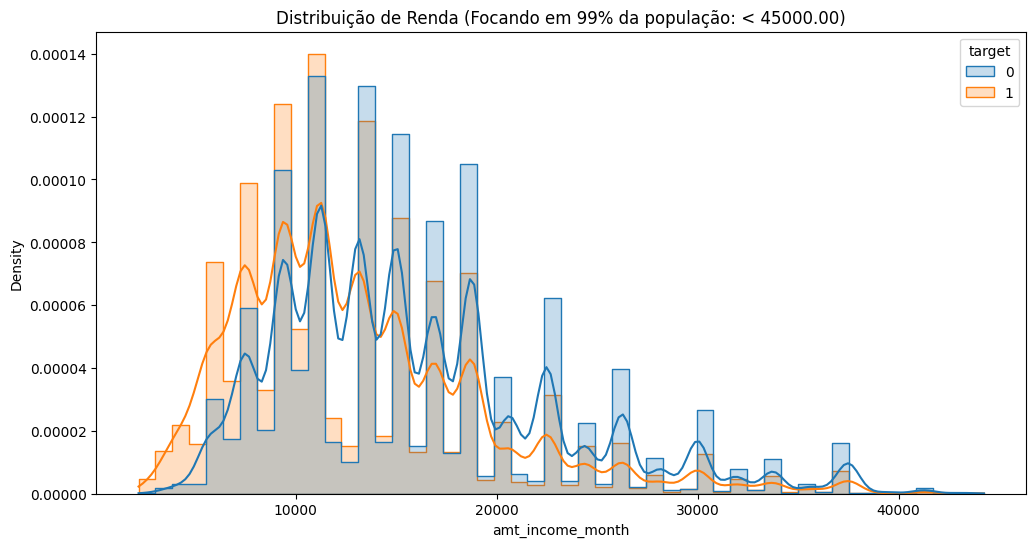

In [48]:

limite_renda = data['amt_income_month'].quantile(0.99)
dados_zoom = data[data['amt_income_month'] < limite_renda]

plt.figure(figsize=(12, 6))

sns.histplot(
    data=dados_zoom, 
    x="amt_income_month", 
    hue="target", 
    kde=True,              
    stat="density",       
    common_norm=False,     
    bins=50,             
    element="step"         
)

plt.title(f'Distribuição de Renda (Focando em 99% da população: < {limite_renda:.2f})')
plt.show()

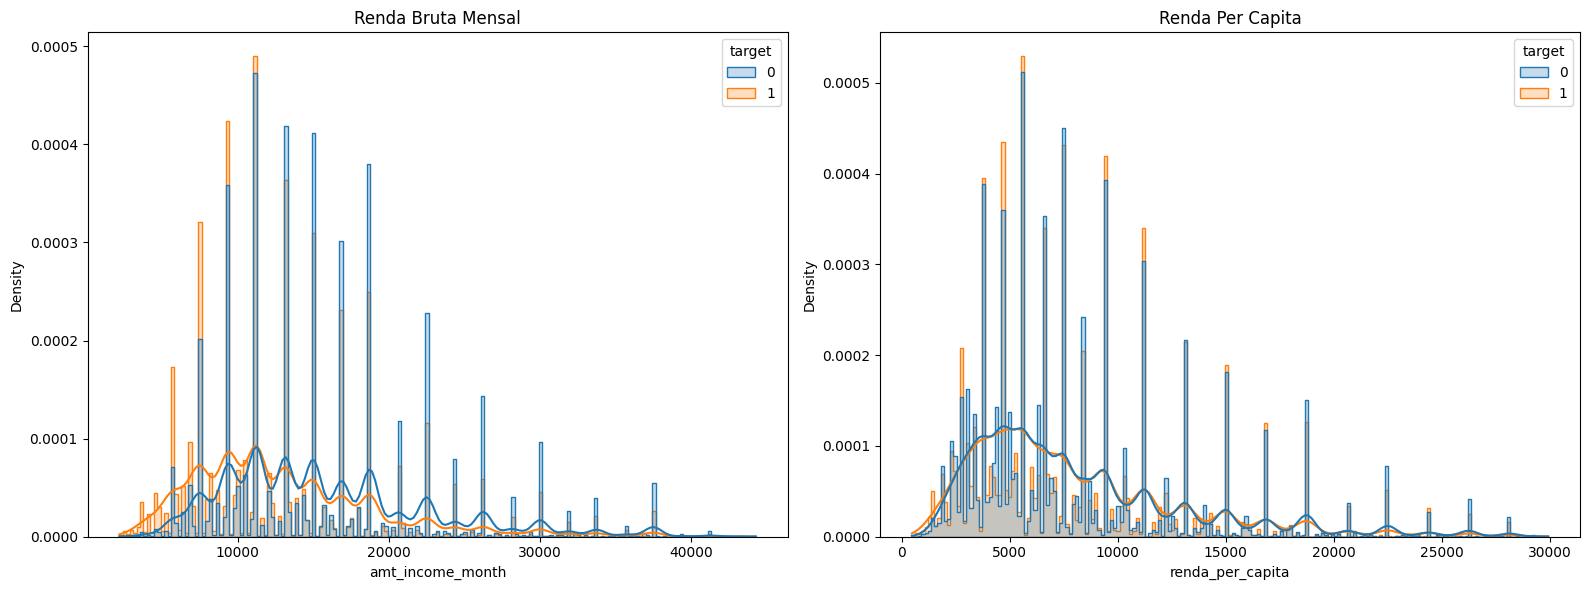

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Filtro de percentil para evitar outliers em ambas
p99_bruta = data['amt_income_month'].quantile(0.99)
p99_capita = data['renda_per_capita'].quantile(0.99)

# Gráfico 1: Renda Bruta
sns.histplot(data=data[data['amt_income_month'] < p99_bruta], 
             x="amt_income_month", hue="target", kde=True, 
             stat="density", common_norm=False, ax=axes[0], element="step")
axes[0].set_title('Renda Bruta Mensal')

# Gráfico 2: Renda Per Capita
sns.histplot(data=data[data['renda_per_capita'] < p99_capita], 
             x="renda_per_capita", hue="target", kde=True, 
             stat="density", common_norm=False, ax=axes[1], element="step")
axes[1].set_title('Renda Per Capita')

plt.tight_layout()
plt.show()

C:\Users\gui-s\AppData\Local\Temp\ipykernel_13484\1557159693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='renda_per_capita',


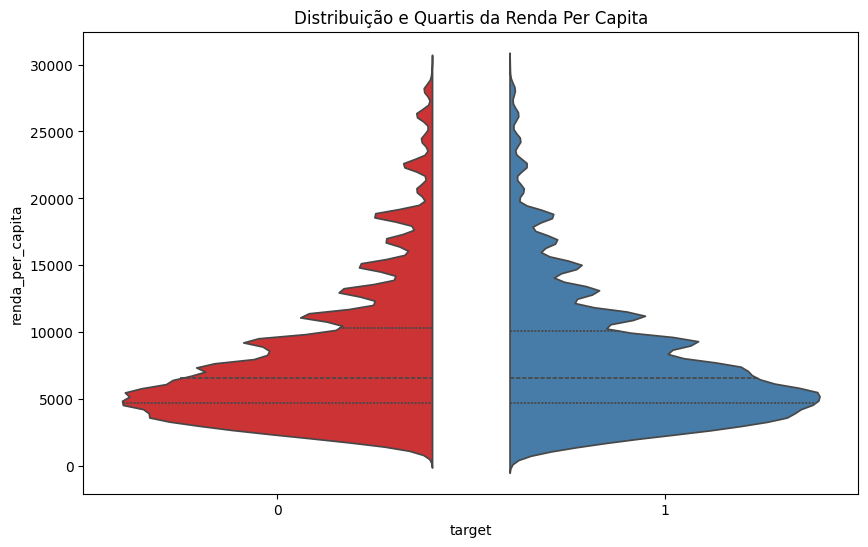

In [ ]:
plt.figure(figsize=(10, 6))

#filtrando o  percentil 99 para evitar outliers(Apenas na visualização)
limite = data['renda_per_capita'].quantile(0.99)

sns.violinplot(x='target', y='renda_per_capita', 
               data=data[data['renda_per_capita'] < limite], 
               split=True, inner="quartile", palette="Set1")

plt.title('Distribuição e Quartis da Renda Per Capita')
plt.show()

C:\Users\gui-s\AppData\Local\Temp\ipykernel_13484\2550315709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


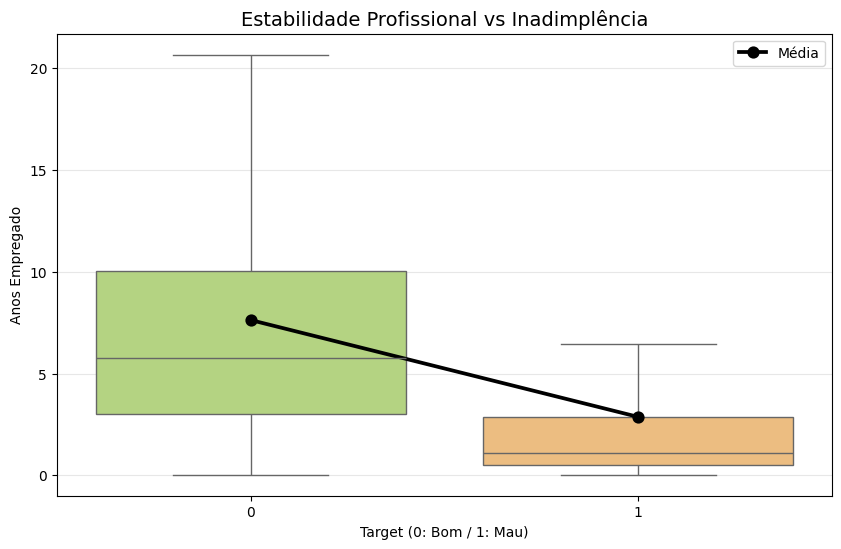

In [ ]:
plt.figure(figsize=(10, 6))

# Filtramos outliers extremos (ex: acima de 40 anos de emprego) para focar na massa de dados

sns.boxplot(
    x='target', 
    y='years_employed', 
    data=data[data['years_employed'] < 40], 
    showfliers=False,  
    palette="RdYlGn_r" 
)

# Adicionando a média para comparação além da mediana
sns.pointplot(x='target', y='years_employed', data=data[data['years_employed'] < 40], 
              estimator='mean', color='black', label='Média')

plt.title('Estabilidade Profissional vs Inadimplência', fontsize=14)
plt.ylabel('Anos Empregado')
plt.xlabel('Target (0: Bom / 1: Mau)')
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

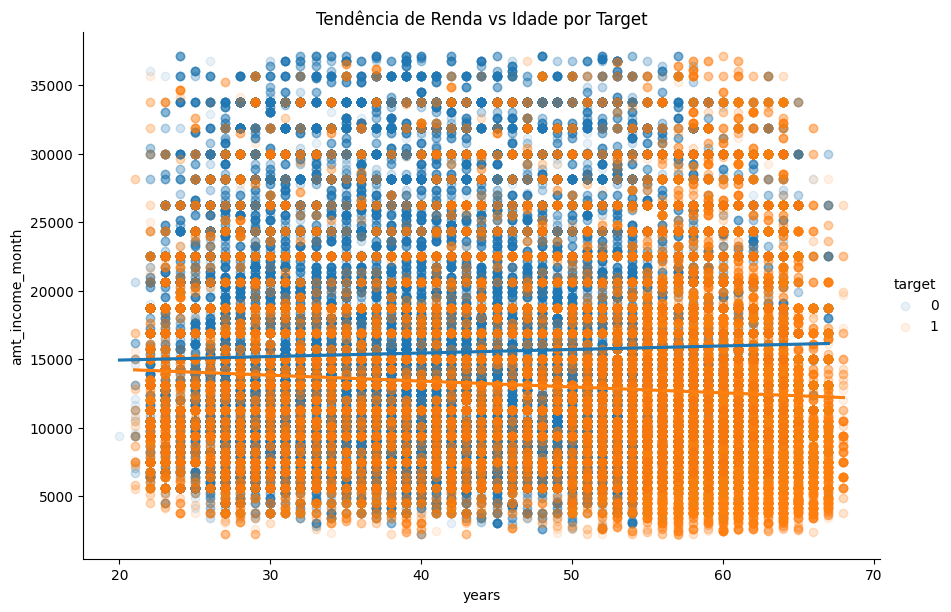

In [61]:
plt.figure(figsize=(12, 6))

# O lmplot traça a reta de regressão e a dispersão
sns.lmplot(
    data=data[data['amt_income_month'] < data['amt_income_month'].quantile(0.98)], 
    x="years", y="amt_income_month", hue="target", 
    scatter_kws={'alpha':0.1}, # Pontos bem transparentes para ver a densidade
    aspect=1.5, height=6
)

plt.title('Tendência de Renda vs Idade por Target')
plt.show()

C:\Users\gui-s\AppData\Local\Temp\ipykernel_13484\564035088.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = data.groupby('age_bins')['target'].mean().reset_index()
C:\Users\gui-s\AppData\Local\Temp\ipykernel_13484\564035088.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_data, x='age_bins', y='target', palette='OrRd')


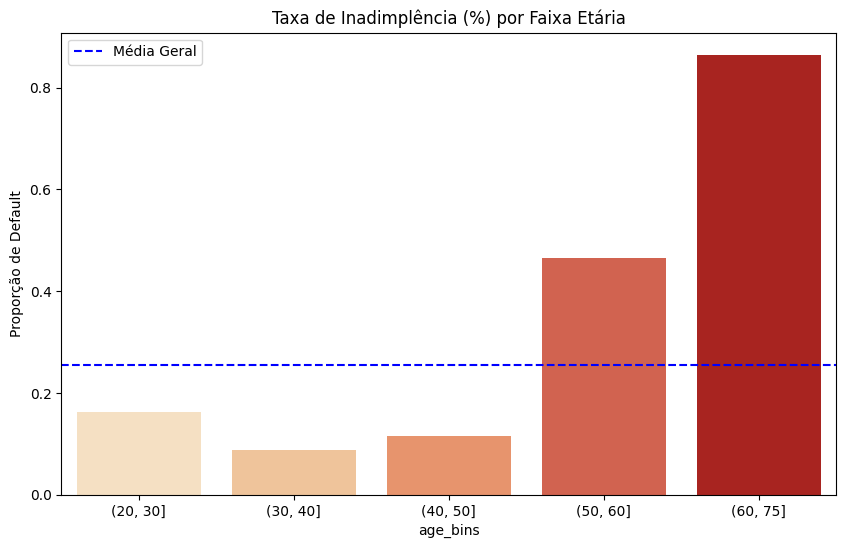

In [62]:
# Criando faixas etárias de 10 em 10 anos
data['age_bins'] = pd.cut(data['years'], bins=[20, 30, 40, 50, 60, 75])

# Calculando a média do target (que é a própria taxa de inadimplência)
prop_data = data.groupby('age_bins')['target'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=prop_data, x='age_bins', y='target', palette='OrRd')

# Adicionando a linha da média geral para referência
plt.axhline(data['target'].mean(), color='blue', linestyle='--', label='Média Geral')

plt.title('Taxa de Inadimplência (%) por Faixa Etária')
plt.ylabel('Proporção de Default')
plt.legend()
plt.show()

C:\Users\gui-s\AppData\Local\Temp\ipykernel_13484\2169176657.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occ_analysis, x='mean', y='NAME_INCOME_TYPE', palette='viridis')


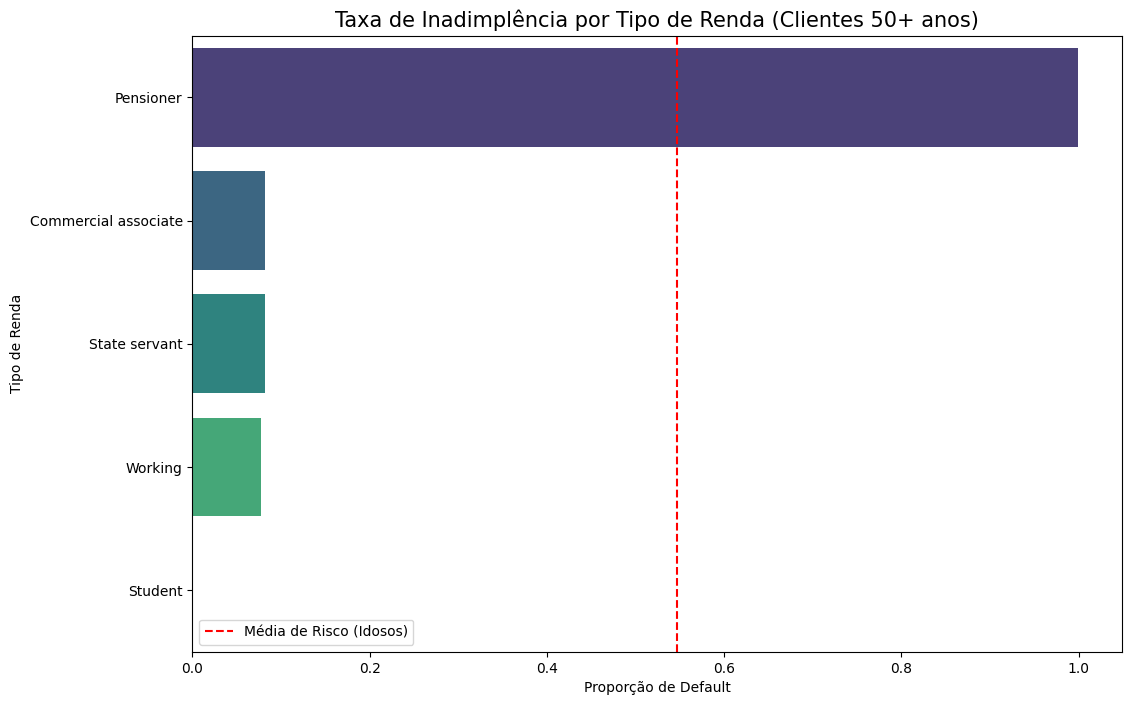

In [65]:
# Filtrando apenas os idosos (zona de risco identificada no gráfico anterior)
idosos = data[data['years'] >= 50].copy()

# Calculando a taxa de inadimplência por ocupação para esse grupo
occ_analysis = idosos.groupby('NAME_INCOME_TYPE')['target'].agg(['mean', 'count']).reset_index()
occ_analysis = occ_analysis.sort_values(by='mean', ascending=False)

# Criando o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=occ_analysis, x='mean', y='NAME_INCOME_TYPE', palette='viridis')

plt.axvline(idosos['target'].mean(), color='red', linestyle='--', label='Média de Risco (Idosos)')
plt.title('Taxa de Inadimplência por Tipo de Renda (Clientes 50+ anos)', fontsize=15)
plt.xlabel('Proporção de Default')
plt.ylabel('Tipo de Renda')
plt.legend()
plt.show()

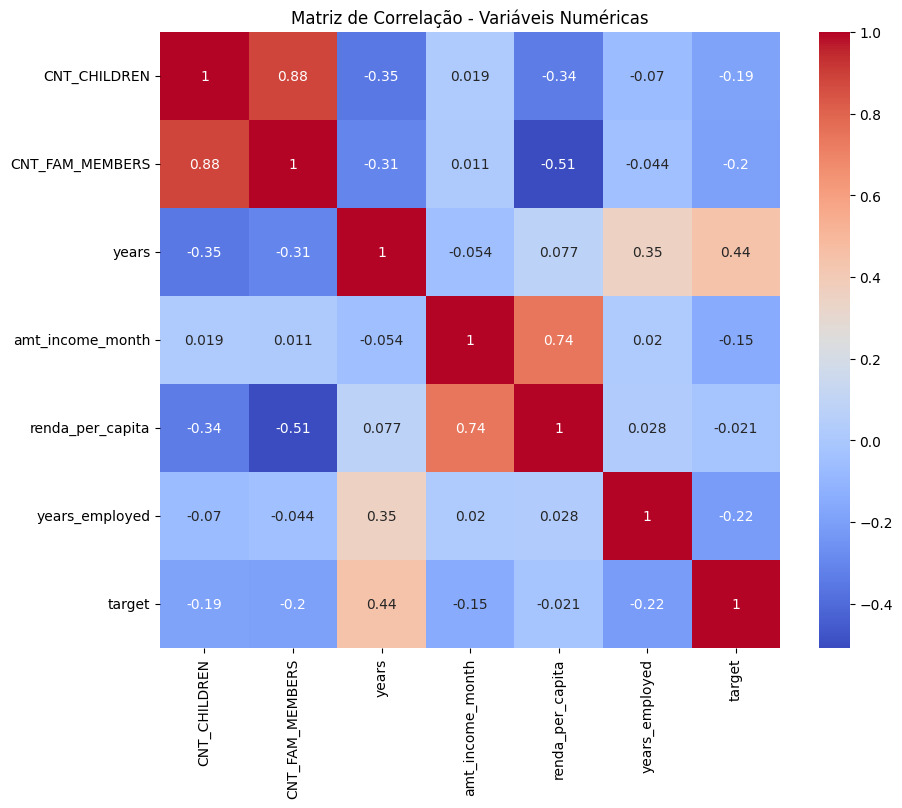

In [70]:
# Selecionar apenas colunas numéricas
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_numeric = data_numeric.drop(columns=['contact', 'ID'], errors='ignore')

plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

## Análise Exploratória de Dados (EDA) – Variáveis Numéricas

Nesta seção, analisamos as variáveis numéricas do dataset com o objetivo de identificar padrões e relações com o target (inadimplência), buscando validar hipóteses sobre renda, idade e estabilidade profissional.

---

### Renda Mensal

- Observação: A análise da distribuição da renda mensal mostrou uma **assimetria à direita**, indicando maior concentração de clientes com rendas mais baixas.
- Insight: Apesar dessa assimetria, **não foi identificada uma forte influência da renda mensal sobre o target**.  
  A taxa de inadimplência se mantém relativamente constante independentemente do nível de renda.

---

### Comparação entre Renda Mensal e Renda Per Capita

- Observação: Para validar a hipótese relacionada à renda, foi realizada uma comparação entre:
  - Distribuição da renda mensal por target
  - Distribuição da renda per capita por target
- Insight: Em ambos os casos, o padrão se manteve:
  - Assimetria à direita
  - Acompanhamento consistente do target em todas as faixas de renda  
  Isso indica que **nem a renda bruta nem a renda ajustada pelo tamanho da família apresentam forte poder explicativo isoladamente**.

---

### Renda Per Capita

- Observação: A análise por meio de violin plot reforçou o comportamento observado anteriormente.
- Insight: A densidade das distribuições para inadimplentes e não inadimplentes é bastante semelhante, confirmando que **a renda per capita não exerce influência significativa sobre a inadimplência**, quando analisada isoladamente.

---

### Estabilidade Profissional

- Observação: Ao analisar o tempo de permanência no emprego em relação ao target, foi identificado um padrão mais evidente.
- Insight: **Clientes com maior estabilidade profissional apresentam uma probabilidade significativamente maior de serem bons clientes**, enquanto indivíduos com histórico profissional instável (curtos períodos de emprego) apresentam maior risco de inadimplência.  
  Essa variável se mostrou um forte indicador de bom comportamento financeiro.

---

### Idade e Relação com o Target

- Observação: A comparação entre idade e target indicou que **a relação não é fortemente linear**, mas alguns padrões sutis foram observados.
- Insight: Clientes mais idosos aparentam apresentar uma taxa de inadimplência ligeiramente maior quando comparados aos mais jovens, embora essa diferença não seja extremamente acentuada em uma primeira análise.

---

### Faixa Etária 50+ Anos

- Observação: Ao segmentar os clientes por faixa etária, foi possível aprofundar a análise.
- Insight: Clientes com **50 anos ou mais apresentam uma taxa de inadimplência superior** em relação aos clientes abaixo dessa faixa etária.

---

### Relação entre Idade, Tipo de Renda e Inadimplência

- Observação: Buscando compreender o motivo da maior inadimplência na faixa etária 50+, foi analisada a relação entre idade e tipo de renda.
- Insight: Foi identificado que grande parte dos clientes 50+ possui **renda proveniente de aposentadoria ou pensão**, o que explica a elevada taxa de inadimplência, que em alguns casos se aproxima de 100%.  
  Dessa forma, a idade atua como um fator indireto, mediado pelo tipo de renda.

---

### Mapa de Calor 

- Observação: A matriz de correlação entre variáveis numéricas consolidou os padrões observados nos gráficos anteriores.
- Insight final:
  - A **idade apresenta correlação positiva relevante com a inadimplência**, indicando maior risco conforme o aumento da idade.
  - A **estabilidade profissional apresenta correlação negativa com o target**, sendo o fator numérico com maior influência para caracterizar um bom cliente.
  
Esses resultados confirmam as hipóteses levantadas ao longo da análise exploratória, destacando a estabilidade profissional como principal indicador positivo e a idade (associada ao tipo de renda) como fator de risco.

---
